# CEFET

**Programa de Pós-Graduação em Ciência da Computação**

**Mestrado em Ciência da Computação**

** Adaptação dos Trabalhos 01 e 02 para Linguagem r**

* Disciplina: Aprendizado de Máquina
* Professor: Eduardo Bezerra
* Aluno: Janio de Souza Lima

# 1 Aprendizado Supervisionado Revisitado

## 1.1 Aprendizado com Regressores

### 1.1.1 Regressão com uma variável

**Carga e análise preliminar dos dados**

In [1]:
#library('')
arquivo <- "https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data1.txt"
dados <- read.table(arquivo,
                    header=FALSE,
                    sep=','
                   )

In [2]:
colnames(dados) <- c('Population', 'Profit')

In [3]:
head(dados)

Population,Profit
6.1101,17.5920
5.5277,9.1302
8.5186,13.6620
7.0032,11.8540
5.8598,6.8233
8.3829,11.8860


In [4]:
X <- dados$Population
y <- dados$Profit

In [5]:
summary(dados)

   Population         Profit      
 Min.   : 5.027   Min.   :-2.681  
 1st Qu.: 5.708   1st Qu.: 1.987  
 Median : 6.589   Median : 4.562  
 Mean   : 8.160   Mean   : 5.839  
 3rd Qu.: 8.578   3rd Qu.: 7.047  
 Max.   :22.203   Max.   :24.147  

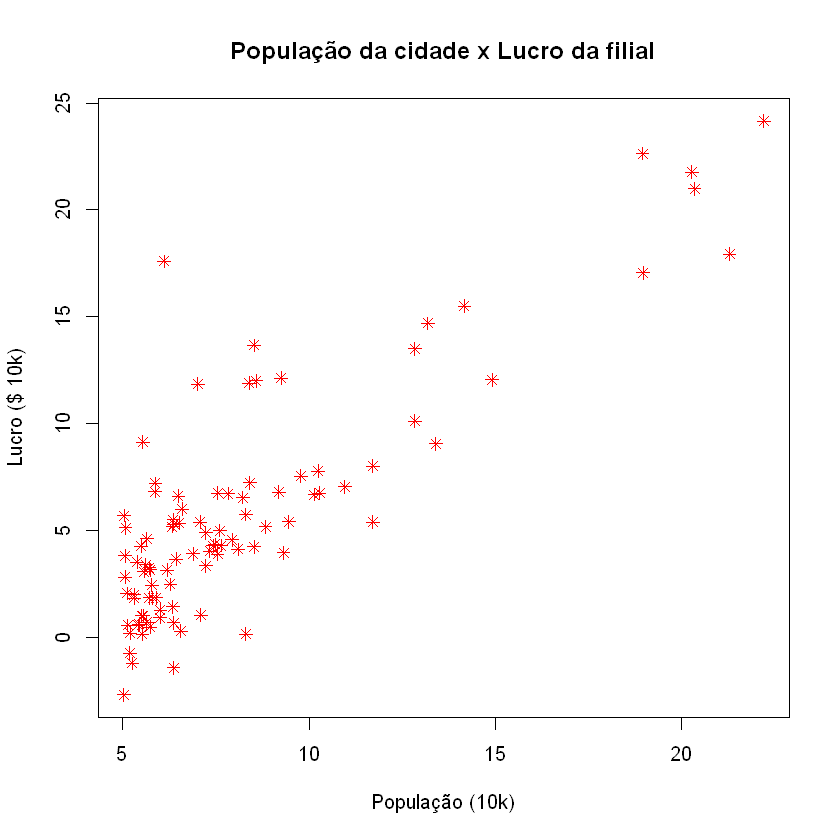

In [6]:
#Ativar para gravar gráfico em arquivo
#pdf("target/plot1.1.1.1.pdf", width = 6, height = 6)


plot(dados$Population,
    dados$Profit,
    ylab="Lucro ($ 10k)",
    xlab="População (10k)",
    main="População da cidade x Lucro da filial",
    pch=8,
    col="red")

#Ativar para gravar gráfico em arquivo
#dev.off()

In [7]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [8]:
set.seed(42) #randomization

#creating indices
trainIndex <- createDataPartition(dados$Population,
                                  p=0.8,
                                  list=FALSE)

In [9]:
X.train <- X[trainIndex]
X.test <- X[-trainIndex]

In [10]:
y.train <- X[trainIndex]
y.test <- X[-trainIndex]

In [11]:
#splitting data into training/testing data using the trainIndex object
DADOS_TRAIN <- dados[trainIndex,] #training data (80% of data)
DADOS_TEST <- dados[-trainIndex,] #testing data (20% of data)

In [12]:
head(DADOS_TRAIN)

,Population,Profit
1,6.1101,17.5920
2,5.5277,9.1302
4,7.0032,11.8540
5,5.8598,6.8233
6,8.3829,11.8860
7,7.4764,4.3483


In [13]:
head(DADOS_TEST)

,Population,Profit
3,8.5186,13.6620
19,6.4296,3.6518
23,5.4901,4.2630
31,5.2524,-1.2200
35,8.2111,6.5426
46,7.0931,1.0463


#### Regressão Linear Simples

In [14]:
regLin <- lm(Profit ~ Population, data=DADOS_TRAIN)
regLin


Call:
lm(formula = Profit ~ Population, data = DADOS_TRAIN)

Coefficients:
(Intercept)   Population  
     -4.216        1.238  


In [15]:
y_pred = predict(regLin, DADOS_TEST)
y_pred

3        19        23        31        35        46        47        51 
 6.327407  3.741906  2.579111  2.284916  5.946822  4.563103  2.059412  5.116466 
       57        58        63        64        70        71        73        80 
 3.549571  2.764267 22.120619 14.235400 20.959681  8.329220  3.217875  2.105825 
       88 
 3.212677

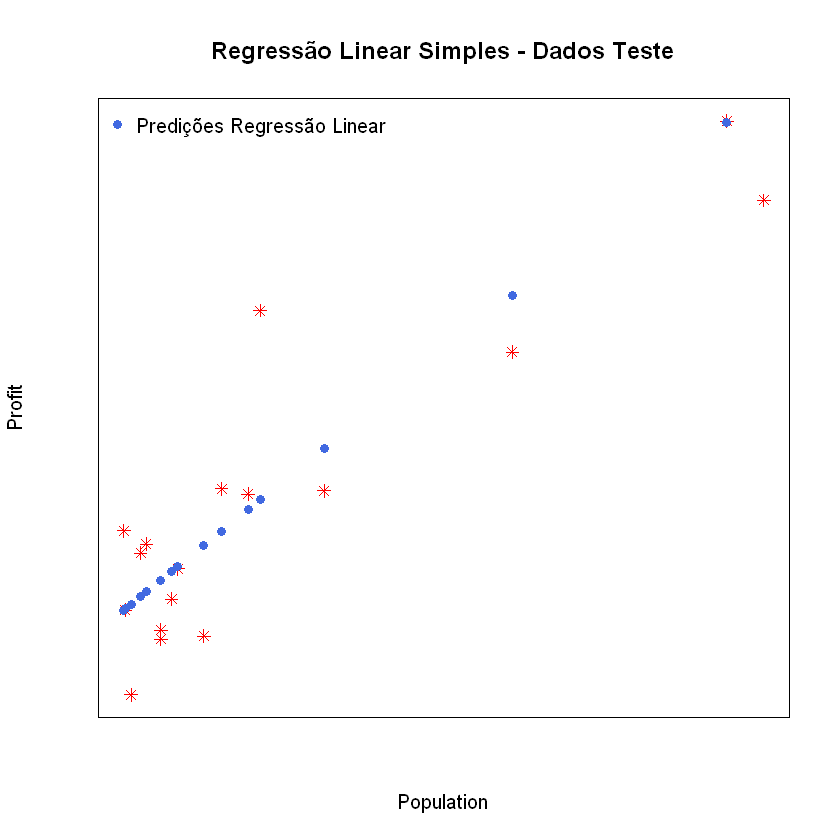

In [16]:
#Ativar para gravar gráfico em arquivo
#pdf("target/plot1.1.1.2.pdf", width = 6, height = 6)

plot(Profit ~ Population, data=DADOS_TEST,
     col="red", main="Regressão Linear Simples - Dados Teste",
     pch=8, xaxt="n", yaxt="n")

points(DADOS_TEST$Population, y_pred, col="royalblue", pch=19)

legend(x = "topleft",
       legend = "Predições Regressão Linear", 
       #lty = 1,
       #lwd = 3,
       bty = "n",
       col="royalblue", pch=19)

#Ativar para gravar gráfico em arquivo
#dev.off()

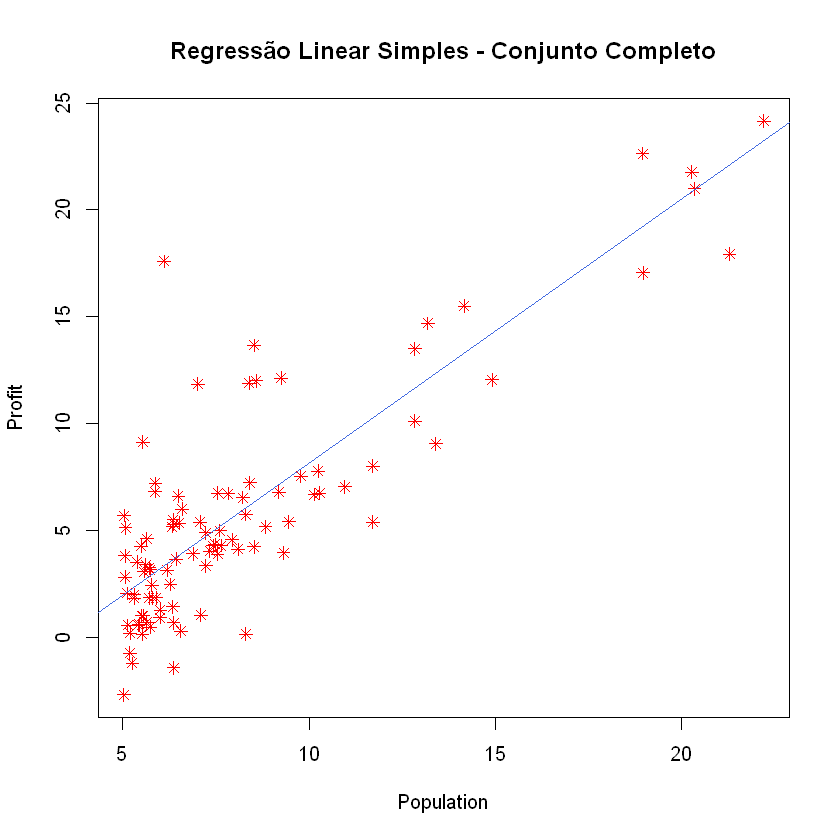

In [17]:
#Ativar para gravar gráfico em arquivo
#pdf("target/plot1.1.1.3.pdf", width = 6, height = 6)

plot(Profit ~ Population, data=dados,
     col="red", main="Regressão Linear Simples - Conjunto Completo",
    pch=8)

abline(regLin, col="royalblue")

#dev.off()

In [18]:
#Função para cálculo do RMSE
rmse = function(actual, predicted) {
  sqrt(mean((actual - predicted) ^ 2))
}

In [19]:
#Avaliação do modelo
rmse(DADOS_TEST$Profit, y_pred)

[1] 2.790159

#### Aplicação do algoritmo k_NN

In [20]:
library(FNN)

Warning message:
"package 'FNN' was built under R version 3.6.3"

In [21]:
knnReg = knn.reg(train = as.data.frame(DADOS_TRAIN$Population),
                 test = NULL,
                 y = DADOS_TRAIN$Profit, k = 15)

knnReg

PRESS =  1235.674 
R2-Predict =  0.4588539 

In [22]:
y_pred = knn.reg(train = as.data.frame(DADOS_TRAIN$Population),
                 test = as.data.frame(DADOS_TEST$Population),
                 y = DADOS_TRAIN$Profit, k = 15)

In [23]:
y_pred

Prediction:
 [1]  6.267363  4.573379  2.173249  1.899561  5.575816  4.897199  1.899561
 [8]  4.718489  4.767499  2.597717 12.732267 11.483407 12.732267  7.422613
[15]  4.160643  1.899561  4.160643

In [24]:
#Avaliação do modelo
rmse(DADOS_TEST$Profit, y_pred$pred)

[1] 3.6312

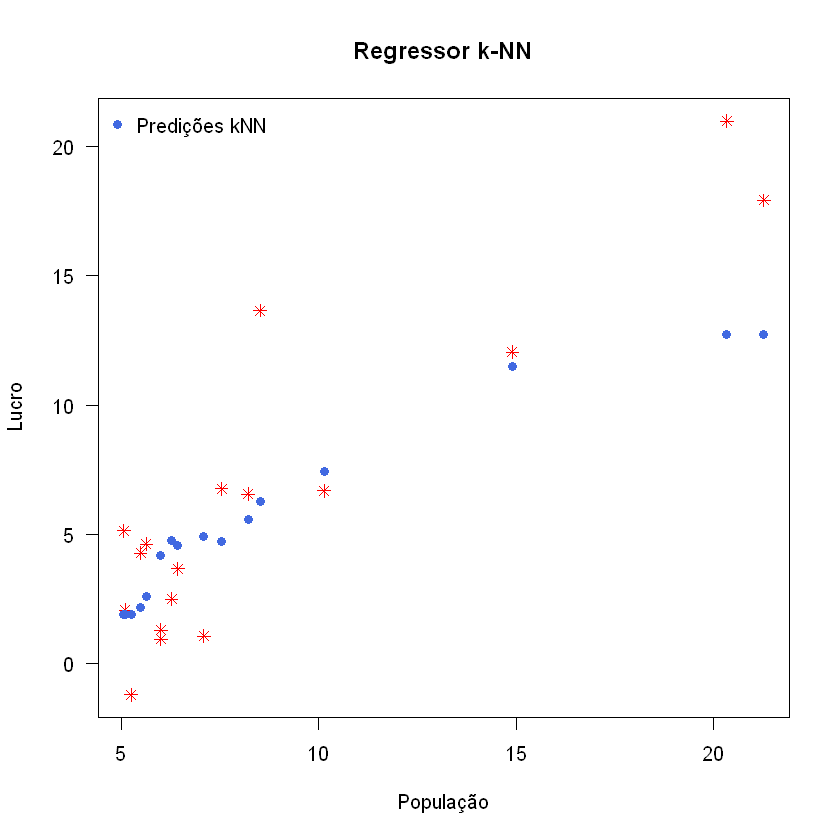

In [25]:
#Ativar para gravar gráfico em arquivo
#pdf("target/plot1.1.1.4.pdf", width = 6, height = 6)

plot(DADOS_TEST$Population, DADOS_TEST$Profit, col="red", main="Regressor k-NN",
    xlab="População", ylab="Lucro", pch=8, xaxt="n", yaxt="n")

points(DADOS_TEST$Population, y_pred$pred, col="royalblue", pch=19)

box(bty = "l")

axis(side = 1)

axis(side = 2, 
     las = 1)

legend(x = "topleft",
       legend = "Predições kNN", 
       #lty = 1,
       #lwd = 3,
       bty = "n",
       col="royalblue", pch=19)

#dev.off()

#### Aplicação do algoritmo Decision Tree

In [26]:
library(rpart)

In [27]:
#Criação do modelo
dTree = rpart(Profit ~ Population, data=DADOS_TRAIN, control=rpart.control(maxdepth=3))
dTree

n= 80 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 80 2283.43900  5.719608  
   2) Population< 12.268 71  871.86040  4.353416  
     4) Population< 5.8306 25  125.11240  1.988773 *
     5) Population>=5.8306 46  530.98760  5.638548  
      10) Population< 8.339 31  360.22090  4.775291 *
      11) Population>=8.339 15   99.92176  7.422613 *
   3) Population>=12.268 9  233.62190 16.497340 *

In [28]:
install.packages("rpart.plot")

Installing package into 'C:/Users/janio/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\janio\AppData\Local\Temp\Rtmpovfl0P\downloaded_packages


In [29]:
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

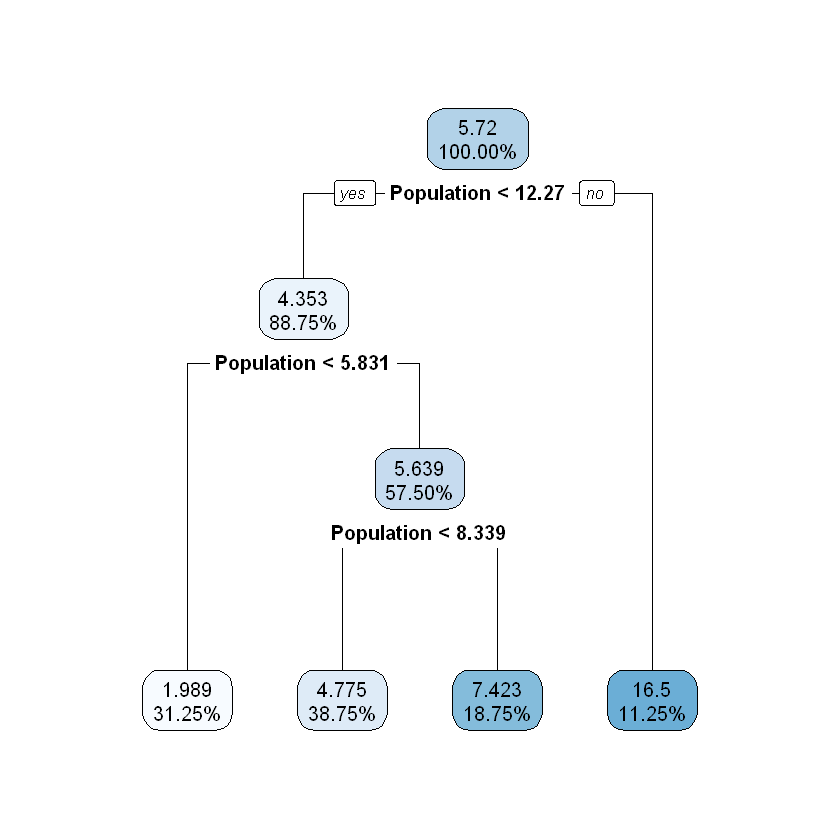

In [30]:
#Ativar para gravar gráfico em arquivo
#pdf("target/plot1.1.1.5.pdf", width = 6, height = 6)

rpart.plot(dTree, type=2, digits=4)

#dev.off()

In [31]:
y_pred = predict(dTree, DADOS_TEST)
y_pred

3        19        23        31        35        46        47        51 
 7.422613  4.775291  1.988773  1.988773  4.775291  4.775291  1.988773  4.775291 
       57        58        63        64        70        71        73        80 
 4.775291  1.988773 16.497344 16.497344 16.497344  7.422613  4.775291  1.988773 
       88 
 4.775291

In [32]:
#Avaliação do modelo
rmse(DADOS_TEST$Profit, y_pred)

[1] 3.145484

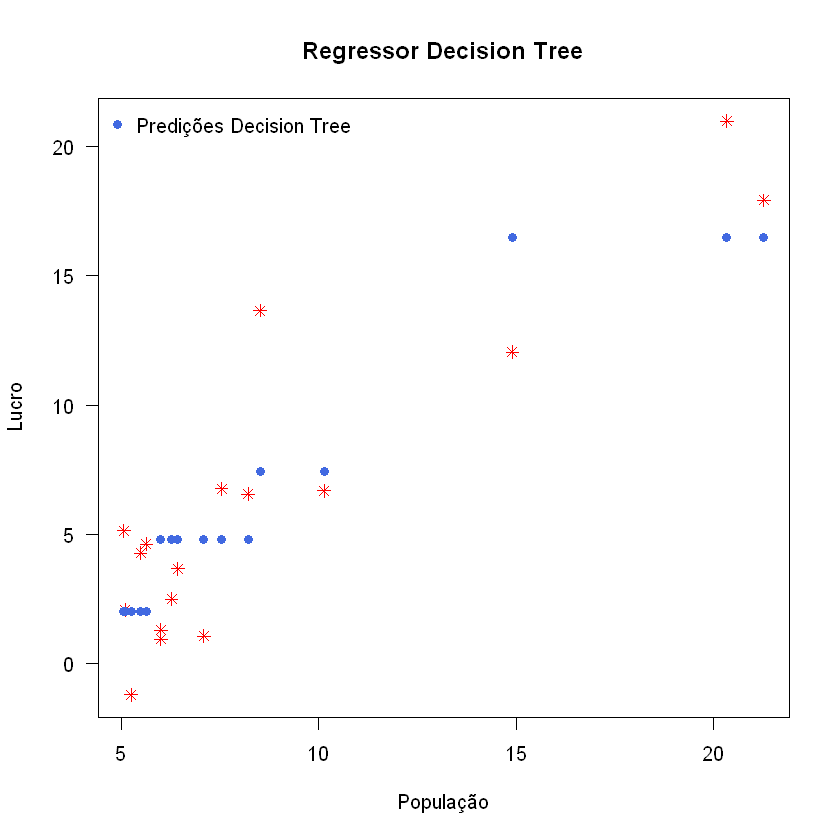

In [33]:
#Ativar para gravar gráfico em arquivo
#pdf("target/plot1.1.1.6.pdf", width = 6, height = 6)

plot(DADOS_TEST$Population, DADOS_TEST$Profit, col="red", main="Regressor Decision Tree",
    xlab="População", ylab="Lucro", pch=8, xaxt="n", yaxt="n")

points(DADOS_TEST$Population, y_pred, col="royalblue", pch=19)

box(bty = "l")

axis(side = 1)

axis(side = 2, 
     las = 1)

legend(x = "topleft",
       legend = "Predições Decision Tree", 
       #lty = 1,
       #lwd = 3,
       bty = "n",
       col="royalblue", pch=19)

#dev.off()

# Referências e Links

**Referências**

Amaral, Fernando (2016). Introdução à Ciência de Dados: Mineração de dados e big data. Alta Books.

Bruce, Andrew. Bruce, Peter (2019). Estatística Prática para Cientistas de Dados: 50 conceitos essenciais. Alta Books.

Escovedo, Tatiana. Koshiyama, Adriano (2020). Introdução a Data Science: algoritmos de machine learning e métodos de análise. Casa do Código.

Géron, Aurélien (2019). Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow: Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Wichkham, Hadley. Grolemund, Garret (2019). R para Data Science: importe, arrume, transforme, visualiza e modele dados. Alta Books.




**Algoritmos e conjuntos de dados:**

* Bibliotecas personalizadas e conjuntos de dados usados na análise: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t1/code

* Códigos complementares usados na análise: https://github.com/janiosl/python.ds/tree/master/ml/T1/code

* Seleção de modelos: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_modelselection.ipynb

* Avaliação de modelo: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_modeleval_sup.ipynb

* Árvore de decisão: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_dtree.ipynb

* kNN: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_knn.ipynb

* Naive Bayes: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_naivebayes.ipynb

* Curva de aprendizado: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve

* Aplicação das funções curva de aprendizado: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

* Análise de Componentes Principais - PCA: https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais

* Agrupamento: https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml_clustering.ipynb

* Detecção de Anomalias: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t2/detanom